In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [3]:
diaper_train = pd.read_excel('diaper_train.xlsx')
diaper_test = pd.read_excel('diaper_test.xlsx')

In [24]:
d = pd.date_range(start='2018-01-01', end='2018-07-31', freq='W-MON').tolist()

In [25]:
len(d)

31

In [26]:
d[0]

Timestamp('2018-01-01 00:00:00', freq='W-MON')

In [28]:
d[30]

Timestamp('2018-07-30 00:00:00', freq='W-MON')

In [8]:
diaper_train.head(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
212,212,2018-01-01 00:00:52,"2,683,481","32,000","1,597,856","241,010,102",1
2357,2357,2018-01-01 00:03:47,"3,579,286","104,700","1,766,436","241,010,102",1


In [10]:
diaper_train.m_id.nunique()

212550

---

In [40]:
# 30주간 기저귀 판매량

ss = []

for i in range(1,len(d)):
    ss.append( diaper_train[ (d[i-1] <= diaper_train.biz_dt) & (diaper_train.biz_dt < d[i]) ].shape[0] )
  
            

In [42]:
ss

[13938,
 14122,
 12429,
 13259,
 17647,
 14545,
 6482,
 13757,
 19685,
 20764,
 13700,
 14967,
 13872,
 20382,
 14816,
 17209,
 19829,
 14044,
 17084,
 22660,
 25746,
 16539,
 25188,
 16471,
 28856,
 17786,
 19566,
 18726,
 28739,
 23397]

In [46]:
sss = pd.DataFrame(ss)/diaper_train.m_id.nunique()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14ced828>]],
      dtype=object)

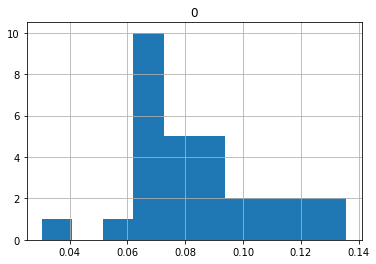

In [48]:
sss.hist()

---

---

## # 다시 시작!

In [51]:
diaper_t_poi = pd.read_csv('diaper_t_poi.csv')

In [53]:
diaper_t_poi = diaper_t_poi.iloc[:,1:]

In [54]:
diaper_t_poi.head()

,0
0,3
1,7
2,2
3,1
4,3


In [55]:
mid = diaper_train.m_id.unique()

In [56]:
mid[0]

'6,200,018'

In [57]:
diaper_train[diaper_train.m_id == mid[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
3125,3125,2018-01-01 00:04:27,"6,200,018","34,900","1,472,659","241,010,102",1
732522,10732522,2018-01-24 09:44:17,"6,200,018","15,800","3,201,607","241,010,102",1


: diaper_t_poi가 맞게 불러온게 맞다!

In [58]:
t = diaper_t_poi.copy()

In [60]:
t = t/30

In [64]:
t.head(10)

,0
0,0.100000
1,0.233333
2,0.066667
3,0.033333
4,0.100000
5,0.066667
6,0.100000
7,0.033333
8,0.100000
9,0.033333


In [67]:
t.columns

Index(['0'], dtype='object')

In [80]:
t.columns = ['t']

In [81]:
t.head()

,t
0,0.100000
1,0.233333
2,0.066667
3,0.033333
4,0.100000


In [82]:
t.columns

Index(['t'], dtype='object')

In [86]:
t.t.value_counts()

0.033333     101142
0.066667      41790
0.100000      23030
0.133333      14723
0.166667       9862
0.200000       6977
0.233333       4753
0.266667       3279
0.300000       2188
0.333333       1557
0.366667        972
0.400000        699
0.433333        481
0.466667        307
0.500000        239
0.533333        144
0.566667        101
0.600000         61
0.633333         57
0.666667         45
0.700000         26
0.733333         24
0.766667         16
0.833333         10
0.800000          8
0.866667          7
1.200000          7
1.033333          3
1.133333          3
1.100000          2
              ...  
1.933333          2
1.366667          1
2.466667          1
2.400000          1
2.766667          1
2.200000          1
2.133333          1
4.900000          1
6.166667          1
9.066667          1
1.300000          1
2.366667          1
0.933333          1
1.633333          1
9.600000          1
4.400000          1
1.566667          1
1.400000          1
1.000000          1


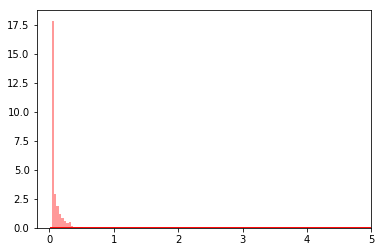

In [103]:
plt.figure()
sns.distplot( t, color = 'red', bins=1000)
#plt.legend()


#plt.ylim(0, 2)
plt.xlim(-0.2, 5)

plt.show()
plt.close()